# Project 1: Cyclic Coordinate Descent for Regularized Logistic Regression

## Datasets

dataset1

dataset2

dataset3

dataset4

dataset_synthetic

In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    precision_score, recall_score, f1_score, balanced_accuracy_score,
    roc_auc_score, average_precision_score, accuracy_score
)
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [246]:
from scipy.special import expit  # Sigmoid function
class LogRegCCD(): 
    """
    **DESCRIPTION**
    """


    def __sigmoid(self, x): 
            return 1 / (1 + np.exp(-x))

    def fit(self, X_train, y_train, lambda_=0.01): 
        def compute_cost(X_train, y_train, lambda_):
            n = len(y_train)
            y_dash = X_train @ self.beta + self.beta_zero
            p = self.__sigmoid(y_dash)
            cost = - (1/n) * np.sum(y_train * np.log(p) + (1 - y_train) * np.log(1 - p))
            reg_term = lambda_ * np.sum(np.abs(self.beta)) / n  # L1 regularization
            return cost + reg_term
        
        def soft_threshold(a, b):
            return np.sign(a) * np.maximum(np.abs(a) - b, 0)
                  
        def calculate_coordinate_descent(X_train, y_train, lambda_, j): 
            y_dash = X_train @ self.beta + self.beta_zero
            p = self.__sigmoid(y_dash)
            p = np.clip(p, 1e-5, 1 - 1e-5)
            w = p * (1 - p)
            z = y_dash + (y_train - p) / w
            self.beta_zero = np.sum(w * z) / np.sum(w)

            residual = z - y_dash + self.beta[j] * X_train.iloc[:, j]
            st_nom = np.sum(w * X_train.iloc[:, j] * residual)

            st_denom = np.sum(w * X_train.iloc[:, j] ** 2)

            return soft_threshold(st_nom, lambda_)/st_denom
        
        g = X_train.shape[1]
        nr_iter = 100
        self.beta_zero = 0
        self.beta = np.zeros(g)

        training_data = []

        for step in range(nr_iter): 
            for j in range(g): 
                beta_j = calculate_coordinate_descent(X_train, y_train, lambda_, j)
                self.beta[j] = beta_j
            cost = compute_cost(X_train, y_train, lambda_)
            training_data.append([step, cost, self.beta_zero] + self.beta.tolist())

        columns = ["Step", "Cost", "Intercept"] + [f"Beta_{i}" for i in range(g)]
        self.training_df = pd.DataFrame(training_data, columns=columns)
        return self




    def validate(self, X_valid, y_valid, measure): 
        """
        **DESCRIPTION**

        Parameters
        ----------
        X_valid:

        y_valid:

        measure: 

        Returns
        -------
        

        """
        # Get predicted probabilities
        y_prob = self.predict_proba(X_valid)

        # Convert probabilities to binary predictions 
        y_pred = (y_prob >= 0.5).astype(int)

        # Compute the performance measure
        score = measure(y_valid, y_pred)
        return score

    def predict_proba(self, X_test): 
        """
        **DESCRIPTION**

        Parameters
        ----------
        X_test: 

        Returns
        -------
        

        """
        return self.__sigmoid(X_test.dot(self.beta) + self.beta_zero)
        


    def plot_score(self, measure): 
        """
        **DESCRIPTION**

        Parameters
        ----------
        measure: 

        Returns
        -------
        

        """
        pass

    def plot_coeff(self): 
        """
        **DESCRIPTION**

        Parameters
        ----------
        X: 

        Returns
        -------
        

        """
        pass





## dataset1

## dataset2

## dataset3

## dataset4

## Synthetic dataset

In [29]:
def generate_synthetic_data(p, n, d, g):
    """
    Generate a synthetic dataset based on the given parameters.
    
    Parameters
    ----------
        p: float
            Prior probability for class Y=1.
        n: int
            Number of observations.
        d:  int
            Dimensionality of feature space.
        g: float 
            Covariance decay factor.
    
    Returns
    ----------
        DataFrame: A DataFrame containing generated features and class labels.
    """
    
    # Generate binry class variable
    y = np.random.binomial(1, p, size=n)

    # Define means for multivariate normal distribution
    mean_0 = np.zeros(d)
    mean_1 = np.array([1 / (i + 1) for i in range(d)])

    # Define covariance matrix S
    indices = np.arange(d)
    S = np.array([[g ** np.abs(i - j) for j in indices] for i in indices])
    
    # Create DataFrame
    X = np.array([
        np.random.multivariate_normal(mean_1 if y_id == 1 else mean_0, S)
        for y_id in y
    ])
    columns = [f'X{i+1}' for i in range(d)]
    X = pd.DataFrame(X, columns=columns)
    
    return X, y


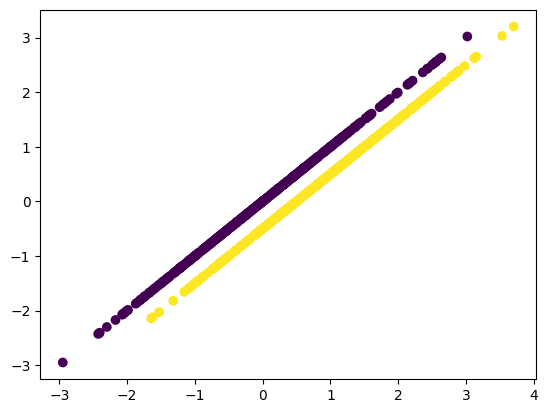

In [219]:
np.random.seed(42)
p = 0.5
n = 1000
d = 2
g = 1

synthetic_X, synthetic_y = generate_synthetic_data(p, n, d, g)
plt.scatter(synthetic_X["X1"], synthetic_X["X2"], c=synthetic_y)
plt.show()

Beta:  [ 13.99353068 -13.91324458]
Beta zero:  -2.517552940456888
-----------------
Accuracy score:  1.0
Precision score:  1.0
Recall score:  1.0
F-measure score:  1.0
Balanced Accuracy score:  1.0
AUC-ROC score:  1.0
AUC-PR: score:  1.0


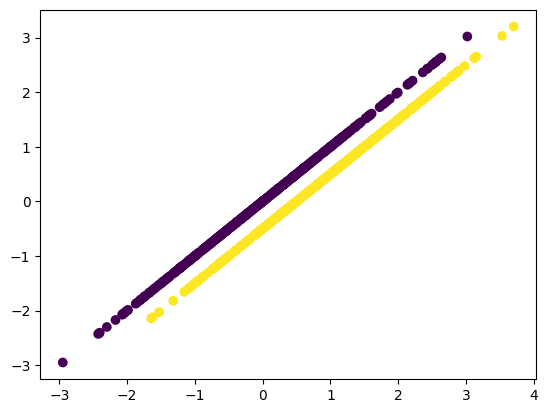

In [247]:
# synthetic_X = pd.DataFrame(StandardScaler().fit_transform(synthetic_X))

logRegCCD = LogRegCCD()
logRegCCD = logRegCCD.fit(synthetic_X, synthetic_y)
# Get predicted probabilities
y_prob_syn = logRegCCD.predict_proba(synthetic_X)

print("Beta: ", logRegCCD.beta)
print("Beta zero: ", logRegCCD.beta_zero)

print("-----------------")

print("Accuracy score: ", logRegCCD.validate(synthetic_X, synthetic_y, accuracy_score))
print("Precision score: ", logRegCCD.validate(synthetic_X, synthetic_y, precision_score))
print("Recall score: ", logRegCCD.validate(synthetic_X, synthetic_y, recall_score))
print("F-measure score: ", logRegCCD.validate(synthetic_X, synthetic_y, f1_score))
print("Balanced Accuracy score: ", logRegCCD.validate(synthetic_X, synthetic_y, balanced_accuracy_score))
print("AUC-ROC score: ", logRegCCD.validate(synthetic_X, synthetic_y, roc_auc_score))
print("AUC-PR: score: ", logRegCCD.validate(synthetic_X, synthetic_y, average_precision_score))

y_pred_syn = (y_prob_syn >= 0.5).astype(int)
plt.scatter(synthetic_X.iloc[:,0], synthetic_X.iloc[:,1], c=y_pred_syn)
plt.show()

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy:  1.0
Beta:  [[ 18.55253214 -18.164251  ]]
Beta zero:  [-4.72283553]


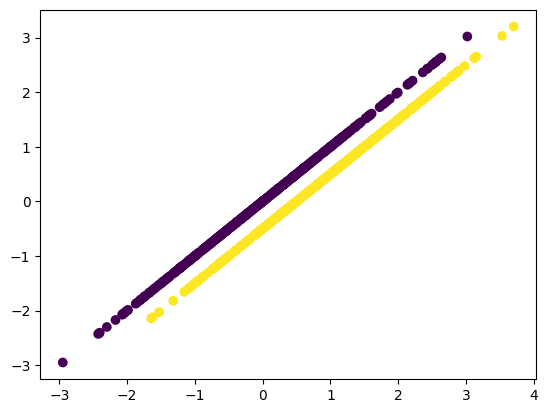

In [248]:
clf = LogisticRegression(random_state=42, penalty='l1', solver='saga').fit(synthetic_X, synthetic_y)
print("Accuracy: ", clf.score(synthetic_X, synthetic_y))

print("Beta: ", clf.coef_)
print("Beta zero: ", clf.intercept_)
y_pred_lg = clf.predict(synthetic_X)
plt.scatter(synthetic_X.iloc[:,0], synthetic_X.iloc[:,1], c=y_pred_lg)
plt.show()

## predict_students_dropout_and_academic_success

In [249]:
student_dropout_X = pd.read_csv("./data/predict_students_dropout_and_academic_success/data.csv", sep=";")
student_dropout_y = (student_dropout_X['Target'] == 'Graduate').astype(int)
student_dropout_X.drop("Target", inplace=True, axis=1)
print(student_dropout_X.shape)
print("Graduated: ", sum(student_dropout_y)/len(student_dropout_y))
student_dropout_X.head()

(4424, 36)
Graduated:  0.4993218806509946


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79


In [250]:
logRegCCD = LogRegCCD()
logRegCCD = logRegCCD.fit(student_dropout_X, student_dropout_y)

print("Beta: ", logRegCCD.beta)
print("Beta zero: ", logRegCCD.beta_zero)

print("-----------------")

print("Accuracy score: ", logRegCCD.validate(student_dropout_X, student_dropout_y, accuracy_score))
print("Precision score: ", logRegCCD.validate(student_dropout_X, student_dropout_y, precision_score))
print("Recall score: ", logRegCCD.validate(student_dropout_X, student_dropout_y, recall_score))
print("F-measure score: ", logRegCCD.validate(student_dropout_X, student_dropout_y, f1_score))
print("Balanced Accuracy score: ", logRegCCD.validate(student_dropout_X, student_dropout_y, balanced_accuracy_score))
print("AUC-ROC score: ", logRegCCD.validate(student_dropout_X, student_dropout_y, roc_auc_score))
print("AUC-PR: score: ", logRegCCD.validate(student_dropout_X, student_dropout_y, average_precision_score))

Beta:  [ 1.03648873e-02 -6.16483330e-03 -4.09818832e-02 -2.11705830e-04
 -3.41234661e-01  1.59195365e-02 -3.67028015e-03 -2.82049552e-02
  2.26326902e-03  4.49835659e-03  6.13119028e-03 -5.92646623e-03
 -2.23934213e-04 -1.57050901e-01 -1.75727999e-01 -9.22546445e-01
  1.74695691e+00 -3.38129887e-01  6.92488533e-01 -2.79785327e-02
  1.39761822e+00 -1.36677468e-01 -2.89905311e-01 -4.05790072e-02
  6.02642024e-01  4.36477869e-03  1.01536218e-01 -9.73185567e-02
 -5.22950583e-01 -7.23237407e-02  8.12003455e-01  8.08986124e-02
  1.24285452e-01 -5.55855518e-02  1.35592808e-03 -3.01558912e-02]
Beta zero:  0.4659652825808853
-----------------
Accuracy score:  0.8474231464737794
Precision score:  0.8203842940685045
Recall score:  0.8890900860117701
F-measure score:  0.8533565066261134
Balanced Accuracy score:  0.8474795802519347
AUC-ROC score:  0.8474795802519347
AUC-PR: score:  0.784775289411515


In [251]:
clf = LogisticRegression(random_state=42, penalty='l1', solver='saga').fit(student_dropout_X, student_dropout_y)
print("Accuracy: ", clf.score(student_dropout_X, student_dropout_y))

print("Beta: ", clf.coef_)
print("Beta zero: ", clf.intercept_)

Accuracy:  0.6618444846292948
Beta:  [[-1.72533981e-04 -1.15581938e-02  3.55333254e-04 -2.10673734e-05
   7.82439004e-06 -1.32316201e-03  4.58163859e-04 -6.27273025e-04
  -7.78359162e-04  7.57815295e-04 -1.18469021e-03 -8.23275428e-04
   2.05094584e-03  1.44932944e-04 -4.30626905e-06 -2.85646591e-04
   4.09042971e-04 -4.39677587e-04  5.30993111e-04 -5.86477278e-03
  -6.47016701e-07  6.46054691e-04  1.51600311e-03 -3.19549139e-04
   6.23851567e-03  7.81136841e-03 -2.06145216e-04  5.76654673e-04
   1.47959794e-03  8.58155489e-06  7.16648687e-03  9.81183195e-03
  -2.91689718e-04 -9.25804942e-05 -1.78295089e-04  3.42063790e-04]]
Beta zero:  [-3.95589641e-05]


c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
